<a href="https://colab.research.google.com/github/KavitaM20AIE244/Face-Recognition-based-Attendance-System/blob/main/yolov3_face_detection/face_detection_yolov3_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import torch
from IPython.display import Image, clear_output
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 2.0.0+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [ ]:
!git clone https://github.com/roboflow-ai/yolov3  # clone

Cloning into 'yolov3'...
remote: Enumerating objects: 8443, done.
remote: Total 8443 (delta 0), reused 0 (delta 0), pack-reused 8443
Receiving objects: 100% (8443/8443), 6.89 MiB | 12.51 MiB/s, done.
Resolving deltas: 100% (5825/5825), done.


## Get Data from Roboflow


In [ ]:
# REPLACE THIS LINK WITH YOUR OWN
!curl -L https://app.roboflow.ai/ds/REPLACE-THIS-LINK | jar -x


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    60  100    60    0     0    260      0 --:--:-- --:--:-- --:--:--   260
100    27  100    27    0     0     30      0 --:--:-- --:--:-- --:--:--     0


## Organize data and labels for Ultralytics YOLOv3 Implementation



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/YOLO_FaceDetection/Face Detection.v7-roboflow-fast-model.darknet.zip' -d /content

In [ ]:
!mkdir train

In [ ]:
!unzip "/content/drive/MyDrive/YOLO_FaceDetection/Face Detection.v7-roboflow-fast-model.darknet.zip"  -d '/content'

In [ ]:
%cd train

/content/train


In [ ]:
%mkdir labels
%mkdir images

In [ ]:
!pwd

/content/train


In [ ]:
import glob
import shutil
import os

dst_dir_img = "/content/train/images"
img_folders= "/content/train"

src_dir = img_folders
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
  shutil.copy(jpgfile, dst_dir_img)

dst_dir_lbl = "/content/train/labels"
lbl_folders = "/content/train"

src_dir = lbl_folders
for jpgfile in glob.iglob(os.path.join(src_dir, "*.txt")):
  shutil.copy(jpgfile, dst_dir_lbl)

In [ ]:
# %mv *.jpg ./images/
# %mv *.txt ./labels/

In [ ]:
%cd images

/content/train/images


In [ ]:
# create Ultralytics specific text file of training images
file = open("train_images_roboflow.txt", "w")
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "train_images_roboflow.txt":
        pass
      else:
        file.write("../train/images/" + filename + "\n")
file.close()

In [ ]:
!pwd

/content/train/images


In [ ]:
!ls

In [ ]:
%cat train_images_roboflow.txt

In [ ]:
%cd ../../valid

/content/valid


In [ ]:
%mkdir labels
%mkdir images

In [ ]:
import glob
import shutil
import os

dst_dir_img = "/content/valid/images"
img_folders= "/content/valid"

src_dir = img_folders
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
  shutil.copy(jpgfile, dst_dir_img)

dst_dir_lbl = "/content/valid/labels"
lbl_folders = "/content/valid"

src_dir = lbl_folders
for jpgfile in glob.iglob(os.path.join(src_dir, "*.txt")):
  shutil.copy(jpgfile, dst_dir_lbl)

In [ ]:
%cd images

/content/valid/images


In [ ]:
# create Ultralytics specific text file of validation images
file = open("valid_images_roboflow.txt", "w")
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "valid_images_roboflow.txt":
        pass
      else:
        file.write("../valid/images/" + filename + "\n")
file.close()

In [ ]:
%cat valid_images_roboflow.txt

## Set up model config

We should configure our model for training.

This requires editing the `roboflow.data` file, which tells our model where to find our data, our numbers of classes, and our class label names.

Our paths for our labels and images are correct.

But we need to update our class names. That's handled below..




In [ ]:
%cd ../../yolov3/data

/content/yolov3/data


In [ ]:
# display class labels imported from Roboflow
%cat ../../train/_darknet.labels

face

In [ ]:
# convert .labels to .names for Ultralytics specification
%cat ../../train/_darknet.labels > ../../train/roboflow_data.names

In [ ]:
def get_num_classes(labels_file_path):
    classes = 0
    with open(labels_file_path, 'r') as f:
      for line in f:
        classes += 1
    return classes

In [ ]:
# update the roboflow.data file with correct number of classes
import re

num_classes = get_num_classes("../../train/_darknet.labels")
with open("roboflow.data") as f:
    s = f.read()
with open("roboflow.data", 'w') as f:

    # Set number of classes num_classes.
    s = re.sub('classes=[0-9]+',
               'classes={}'.format(num_classes), s)
    f.write(s)

In [ ]:
# display updated number of classes
%cat roboflow.data

classes=1
train=../train/images/train_images_roboflow.txt
valid=../valid/images/valid_images_roboflow.txt
names=../train/roboflow_data.names


## Conduct inference and display results



In [ ]:
import torch


## Detection on 100 sample images from WiderFace Dataset

In [ ]:
!python3 detect.py --weights /content/drive/MyDrive/YOLO_FaceDetection/ultralytics_yolo/best.pt --conf-thres 0.03 --source=../test2 --names=../train/roboflow_data.names

Namespace(cfg='cfg/yolov3-spp.cfg', names='../train/roboflow_data.names', weights='/content/drive/MyDrive/YOLO_FaceDetection/ultralytics_yolo/best.pt', source='../test2', output='output', img_size=416, conf_thres=0.03, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
video 1/1 (1/392) ../test2/IMG-7626.mp4: 416x256 1 faces, Done. (0.168s)
video 1/1 (2/392) ../test2/IMG-7626.mp4: 416x256 1 faces, Done. (0.025s)
video 1/1 (3/392) ../test2/IMG-7626.mp4: 416x256 1 

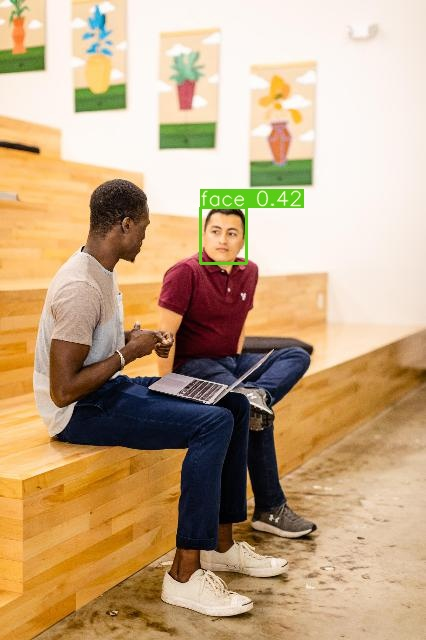

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
test = cv2.imread("/content/yolov3/output/roboflow-44_jpg.rf.26c09c9ffe73c09a2681ac7255c666bb.jpg")
cv2_imshow(test)